In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(0, 0.5, 'Average glucose level')

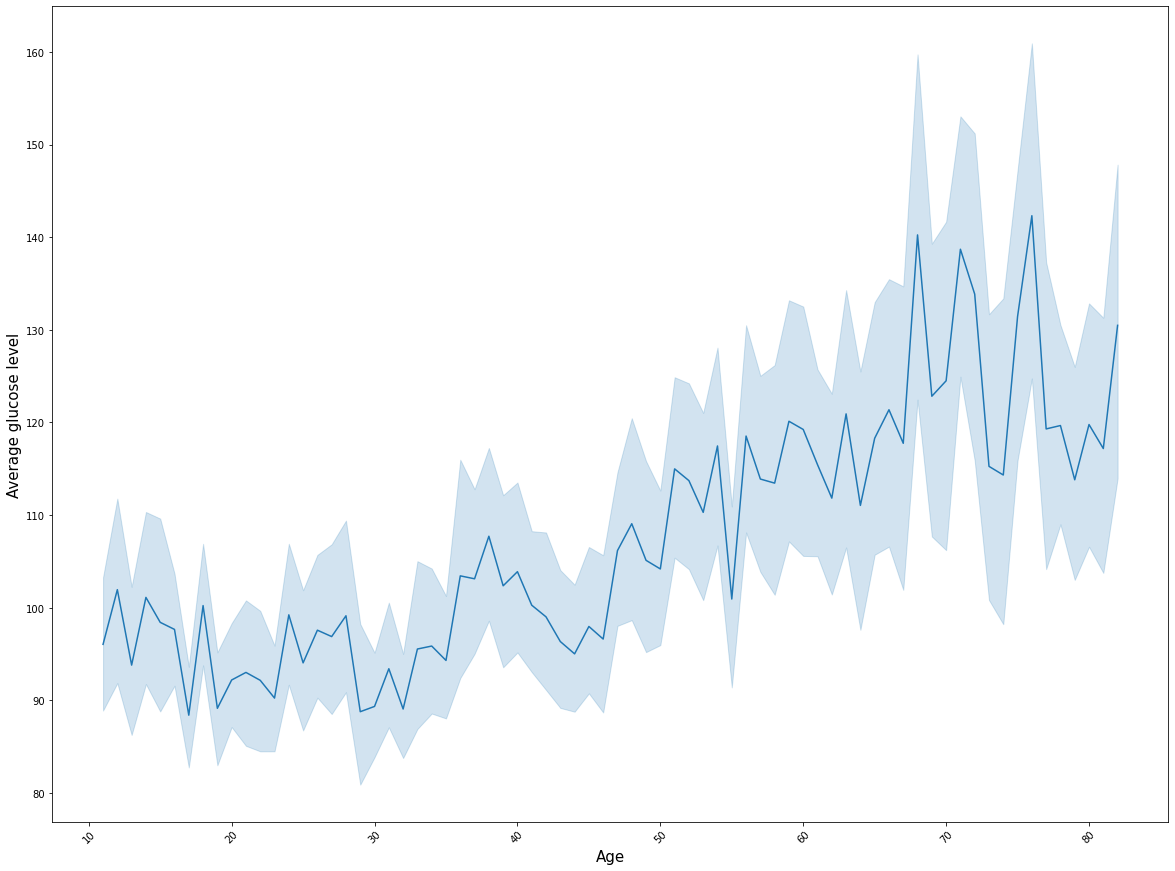

In [4]:
plt.figure(figsize=(20,15))
sns.lineplot(x='age', y='avg_glucose_level', data=stroke[stroke['age'] > 10])
plt.xticks(rotation=45)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Average glucose level', fontsize=15)

Text(0, 0.5, 'Average glucose level')

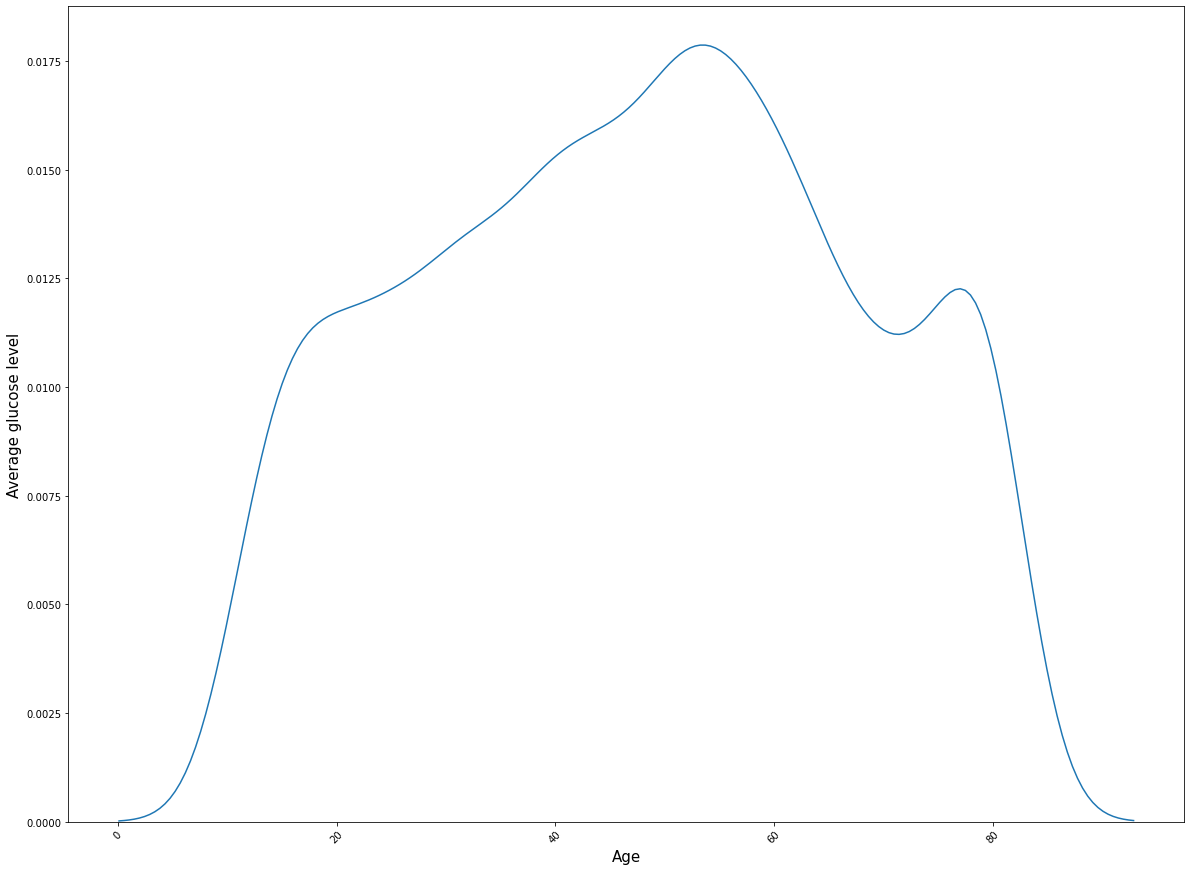

In [5]:
plt.figure(figsize=(20,15))
sns.kdeplot(x='age', data=stroke[stroke['age'] > 10])
plt.xticks(rotation=45)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Average glucose level', fontsize=15)

In [6]:
stroke['gender'] = stroke['gender'].replace({'Male':0,'Female':1,'Other':-1})
stroke['Residence_type'] = stroke['Residence_type'].replace({'Rural':0,'Urban':1})
stroke['work_type'] = stroke['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [12]:
X  = stroke[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = stroke['stroke']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [14]:
clf = LogisticRegression(random_state=3).fit(X_train, y_train)

C:\Users\lucas.lima\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
stroke = stroke.fillna(np.mean(stroke['bmi']))

In [16]:
score = clf.score(X_test, y_test)

In [21]:
prediction = clf.predict(X_test)
cm = confusion_matrix(y_test,prediction)

In [22]:
print(f' {cm}')

 [[3404    0]
 [ 173    0]]


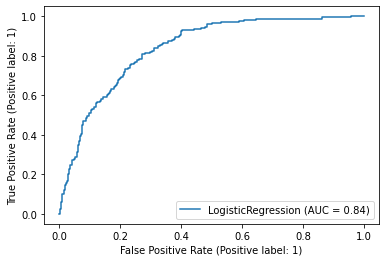

In [24]:
metrics.plot_roc_curve(clf, X_test, y_test)